<a href="https://colab.research.google.com/github/harsh-kakadiya1/Machine-Learning-projects/blob/main/project2/FoodDeliverySystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Delivery Customer Segmentation Analysis

Welcome to this notebook, which details a customer segmentation project for a food delivery service. We will:

-   Load and preprocess customer data.
-   Apply various clustering algorithms (K-Means, Agglomerative, DBSCAN) to segment customers.
-   Visualize clusters and derive insights for business strategies.

## 1. Goal and Objective

### Goal

To identify distinct customer segments within a food delivery dataset based on behavioral and demographic attributes, enabling targeted marketing and personalized service.

### Objective

*   **Data Preparation:** Explore, clean, and preprocess the dataset (encoding, scaling, dimensionality reduction).
*   **Clustering:** Apply K-Means, Agglomerative Clustering, and DBSCAN to segment customers.
*   **Visualization & Insights:** Visualize clusters, interpret results, and present key observations.

## 2. Importing Libraries and Loading Data

### Importing Required Libraries

Essential Python libraries for data manipulation, visualization, and machine learning are imported.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as dendrogram

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage, dendrogram

### Dataset Overview

The `food_delivery.csv` dataset is loaded and its first few rows are displayed for an initial review of its structure and content.

In [ ]:

df = pd.read_csv("C:/Users/Krish/Desktop/STUDY/5th sem/MLPR/data_mlpr/food_delivery.csv")
df.head(10)


## 3. Basic Dataset Information

### Basic Information and Data Quality Check

This section verifies the dataset's dimensions, checks for missing values, and identifies duplicate records to ensure data quality.

Check the shape of the DataFrame (rows, columns):

In [ ]:
df.shape

**Outcome:** `(500, 7)` confirms 500 rows and 7 columns.

Check for null values:

In [ ]:
# Check for null values
df.isna().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

**Outcome:** All columns show `0` null values, indicating a complete dataset.

Check for duplicate rows:

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

**Outcome:** `0` duplicates found, confirming no redundant records.

### Descriptive Statistics

Descriptive statistics for numerical columns are generated to understand their distribution, central tendency, and spread.

In [ ]:
df.describe()

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


## Visualizing Feature Distributions


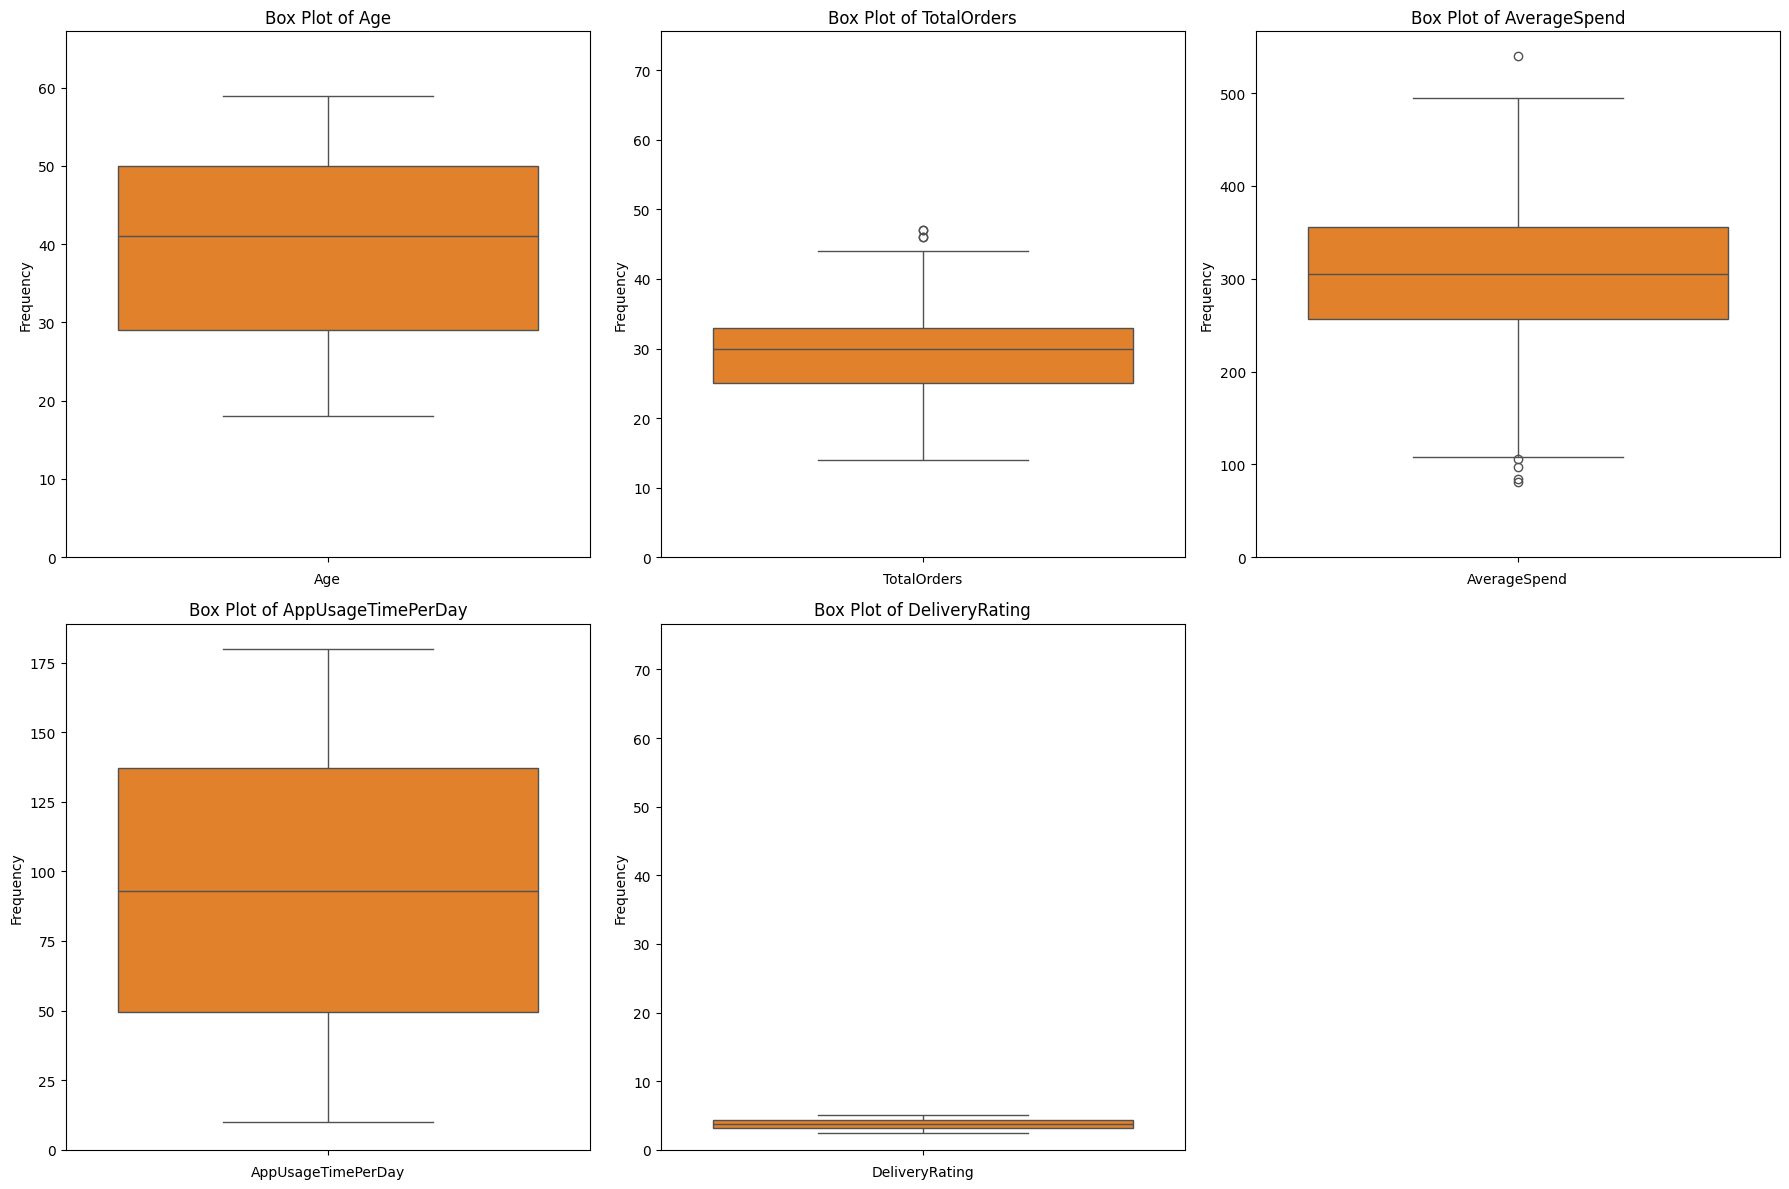

In [ ]:
plt.figure(figsize=(18, 12))

# List of numerical columns to plot (excluding UserID and encoded fav_cuisine for now)
numerical_cols = ['Age', 'TotalOrders', 'AverageSpend', 'AppUsageTimePerDay', 'DeliveryRating']

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    sns.boxplot(y=df[col]) # You can also add box plots for outlier detection
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


Pair Plot of Numerical Features:


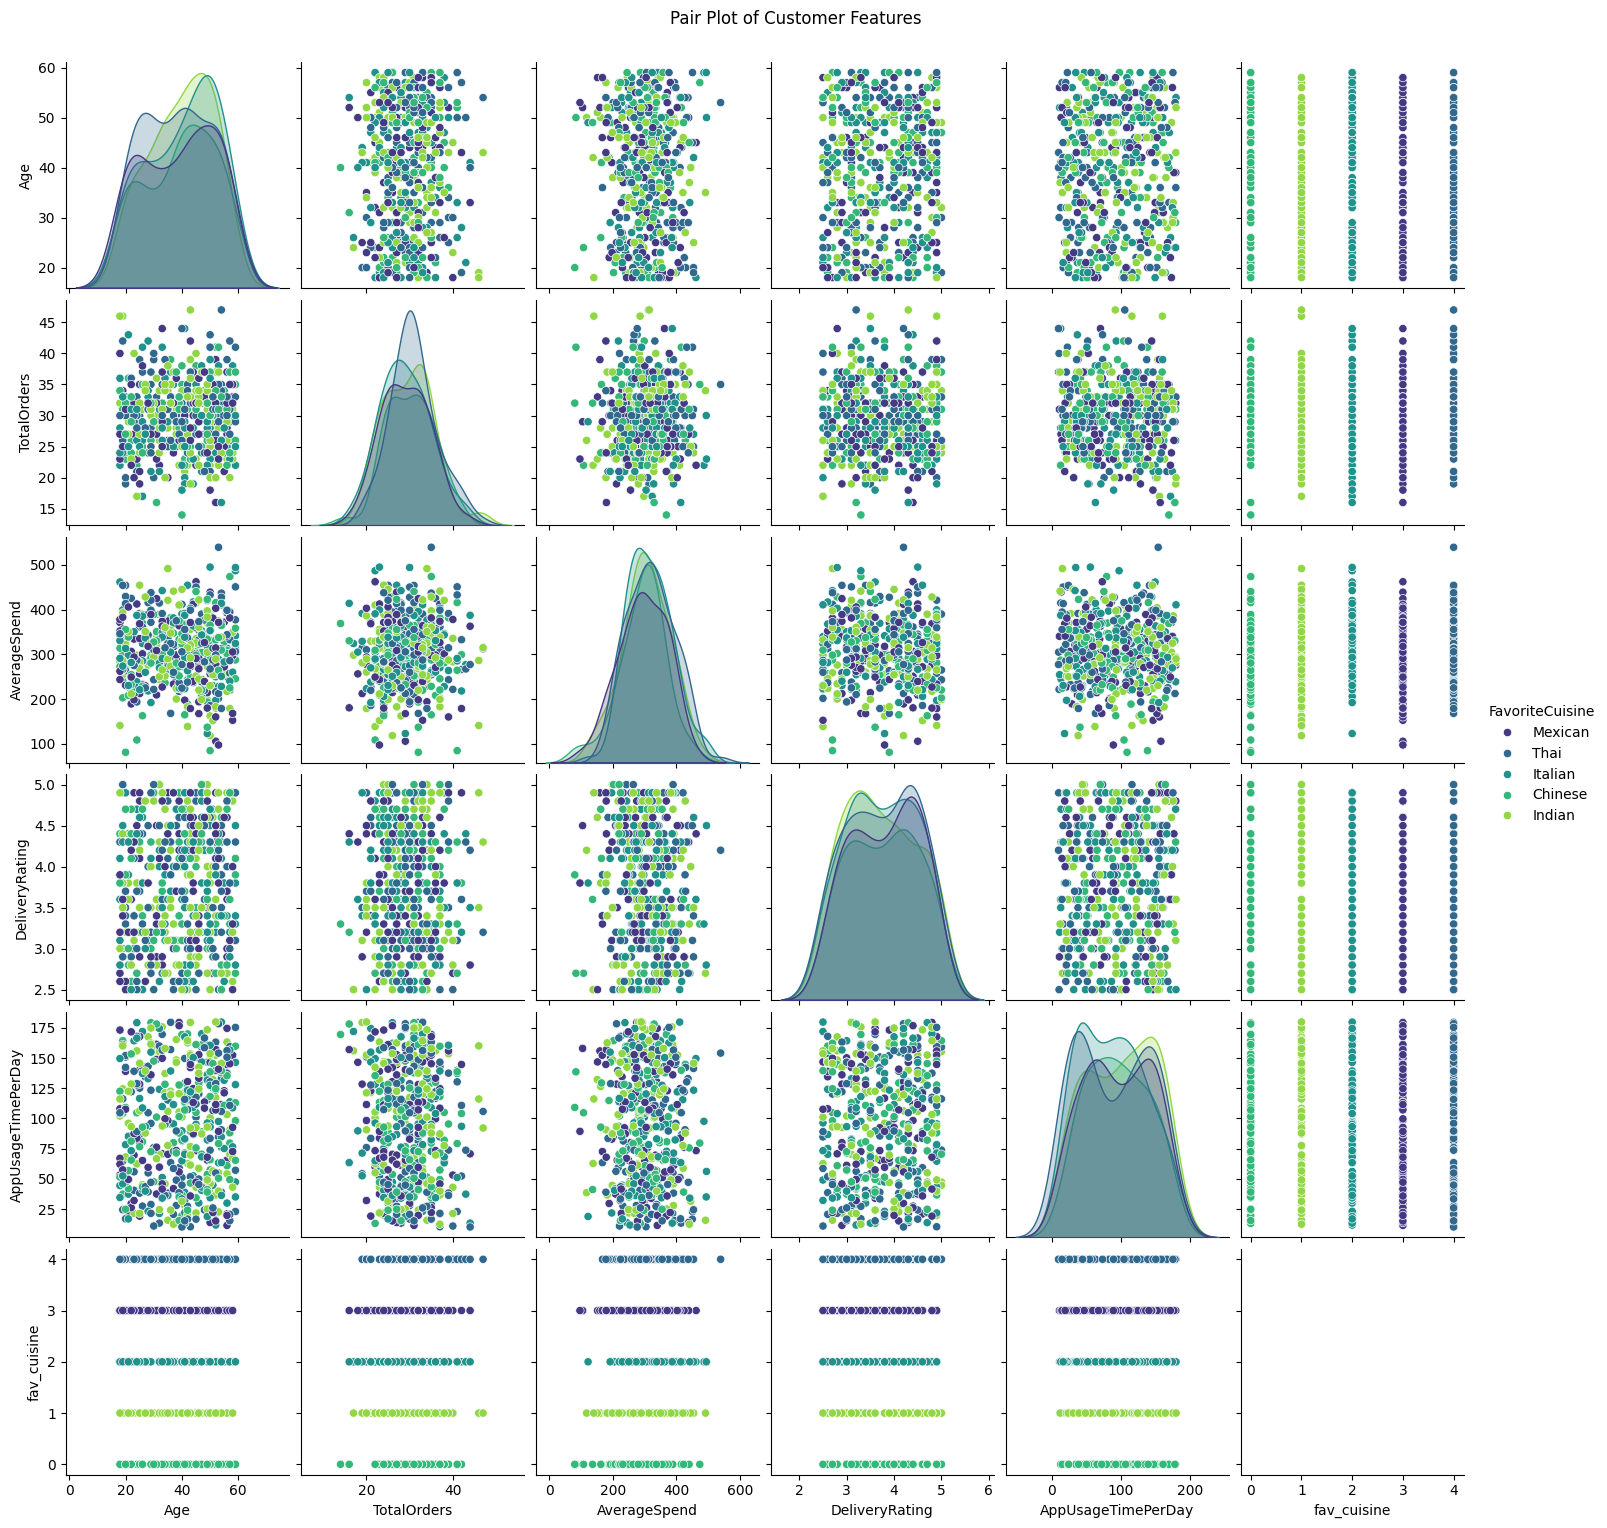

In [ ]:
# Pair Plot for overall relationships and potential initial clusters
# This can be heavy for many features, but useful for understanding interactions
# Consider using data1 directly, as FavoriteCuisine is now encoded

print("\nPair Plot of Numerical Features:")
sns.pairplot(df.drop('UserID', axis=1), hue='FavoriteCuisine', palette='viridis') # Dropping UserID and using fav_cuisine for hue
plt.suptitle('Pair Plot of Customer Features', y=1.02) # Adjust title position
plt.show()

## 4. Data Preprocessing

### Feature Encoding and DataFrame Preparation

The categorical `FavoriteCuisine` column is converted into numerical labels using `LabelEncoder`. The original `FavoriteCuisine` column is then dropped, creating `data1` which includes the new `fav_cuisine` column.

In [ ]:
le = LabelEncoder()
df['fav_cuisine'] = le.fit_transform(df['FavoriteCuisine'])
data1 = df.drop(['FavoriteCuisine'],axis=1)

### Distribution of Encoded `fav_cuisine`

The frequency of each encoded cuisine type is examined to understand customer preferences.

In [ ]:
data1

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay,fav_cuisine
0,1,56,37,312.70,4.6,20.9,3
1,2,46,34,193.97,3.0,150.2,3
2,3,32,22,291.66,4.1,59.7,3
3,4,25,30,232.21,3.7,85.5,4
4,5,38,27,244.84,4.7,13.7,2
...,...,...,...,...,...,...,...
495,496,56,30,398.62,4.3,150.7,4
496,497,49,27,423.00,3.6,39.0,0
497,498,41,31,355.66,3.6,15.2,4
498,499,40,29,305.66,4.1,44.8,4


In [ ]:
data1['fav_cuisine'].value_counts()

fav_cuisine
4    108
2    106
1    104
3     95
0     87
Name: count, dtype: int64

**Outcome:** value_counts() shows varying popularity among cuisines (e.g., type 4 most frequent with 108, type 0 least frequent with 87), indicating uneven distribution of customer preferences.

## 5. Bivariate/Multivariate Analysis

### Correlation Matrix Heatmap

A heatmap visualizing the Pearson correlation coefficients between numerical features in `data1` is generated. This helps in understanding linear relationships between variables.

<Axes: >

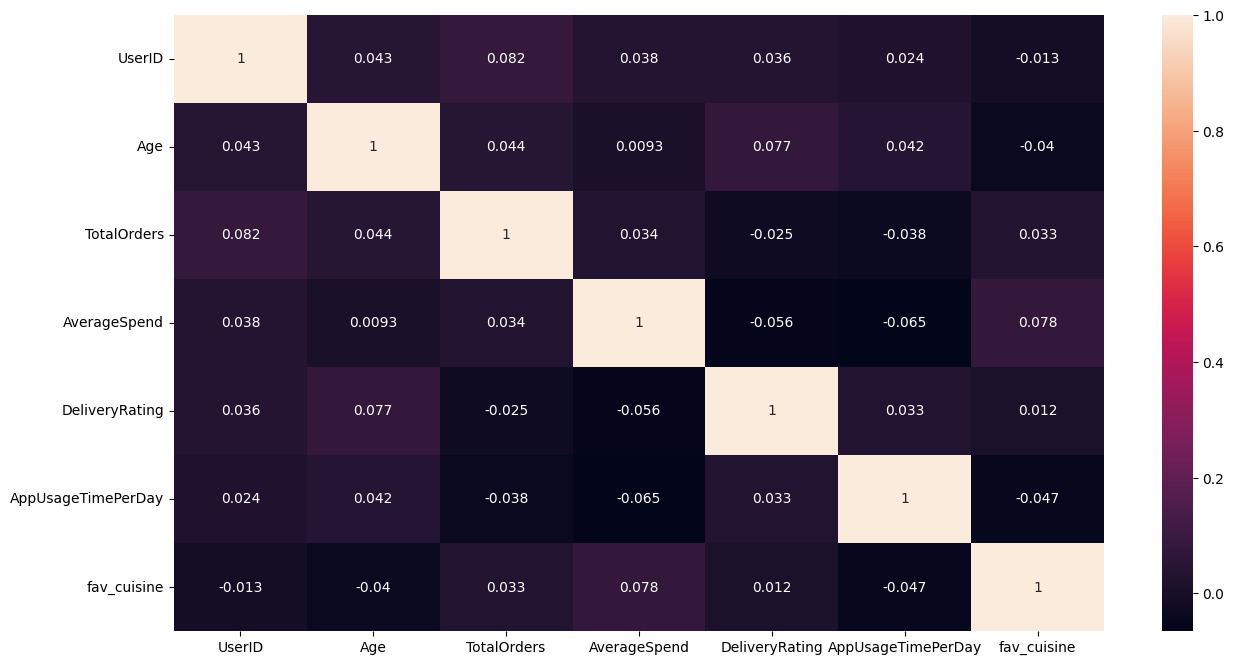

In [ ]:
corr=data1.corr()
corr
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

**Outcome**: The heatmap shows strong positive correlation between TotalOrders and AverageSpend. Other correlations are low to moderate, suggesting features provide unique insights for clustering.

In [ ]:
X = data1.drop('UserID',axis=1)

## 6. Feature Scaling and Dimensionality Reduction

### Feature Scaling

Before applying most clustering algorithms, it is crucial to scale numerical features. This prevents features with larger numerical ranges (like `AverageSpend`) from disproportionately influencing distance calculations compared to features with smaller ranges (like `DeliveryRating`). `StandardScaler` transforms the data so each feature has a mean of 0 and a standard deviation of 1. The `UserID` column is dropped as it's an identifier, not a feature for clustering.

### explanation of work done

The first line creates X by removing UserID from data1, leaving only the features relevant for clustering. StandardScaler is initialized and then fit_transform is applied to X, standardizing all its numerical columns. X_Scaled now holds the processed, scaled features.

In [ ]:
sc=StandardScaler()

X_Scaled=sc.fit_transform(X)

### Dimensionality Reduction using PCA

Following scaling, Principal Component Analysis (PCA) is applied to reduce the dimensionality of the dataset. This transformation projects the data into a lower-dimensional space while retaining most of its variance, which is essential for visualizing high-dimensional clusters in 2D plots. Here, `n_components=2` is chosen to reduce the data to two principal components.

**Explanation:** PCA(n_components=2) initializes PCA to extract the top 2 principal components. pca.fit_transform(X_Scaled) then applies this transformation to the scaled data, reducing its dimensions. X_pca now contains the data represented by these two principal components, which are orthogonal and capture the most variance.

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_Scaled)

## Effect of Feature Scaling

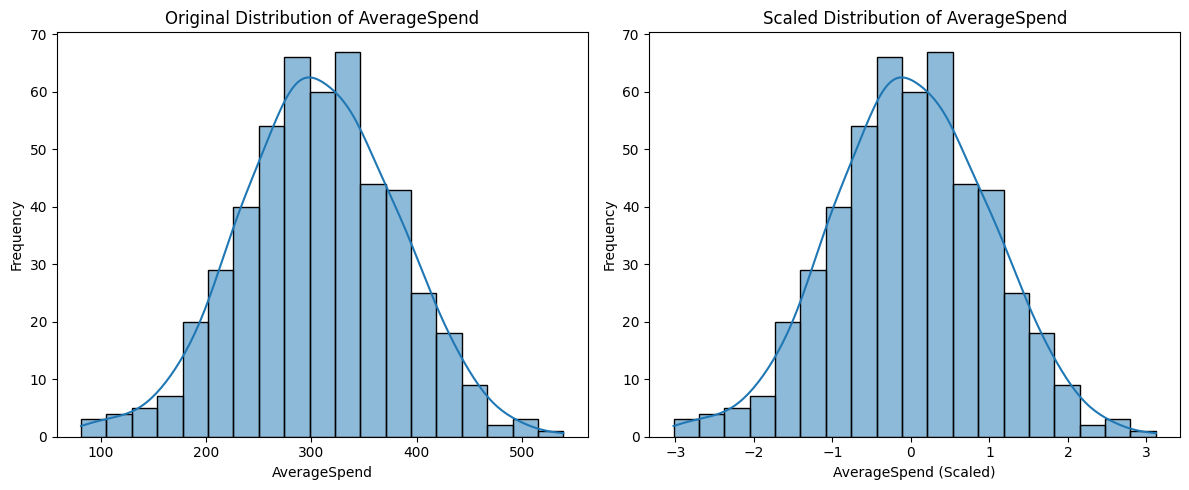

In [ ]:
# Select a feature to visualize before and after scaling (e.g., AverageSpend, as it often has a wide range)
feature_name = 'AverageSpend'
feature_index = X.columns.get_loc(feature_name) # Get index of the feature in X

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X[feature_name], kde=True)
plt.title(f'Original Distribution of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(X_Scaled[:, feature_index], kde=True)
plt.title(f'Scaled Distribution of {feature_name}')
plt.xlabel(f'{feature_name} (Scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Mean of original {feature_name}: {X[feature_name].mean():.2f}")
print(f"Std Dev of original {feature_name}: {X[feature_name].std():.2f}")
print(f"Mean of scaled {feature_name}: {X_Scaled[:, feature_index].mean():.2f}")
print(f"Std Dev of scaled {feature_name}: {X_Scaled[:, feature_index].std():.2f}")

Mean of original AverageSpend: 306.58
Std Dev of original AverageSpend: 74.73
Mean of scaled AverageSpend: 0.00
Std Dev of scaled AverageSpend: 1.00


## Explained Variance Ratio by Principal Components

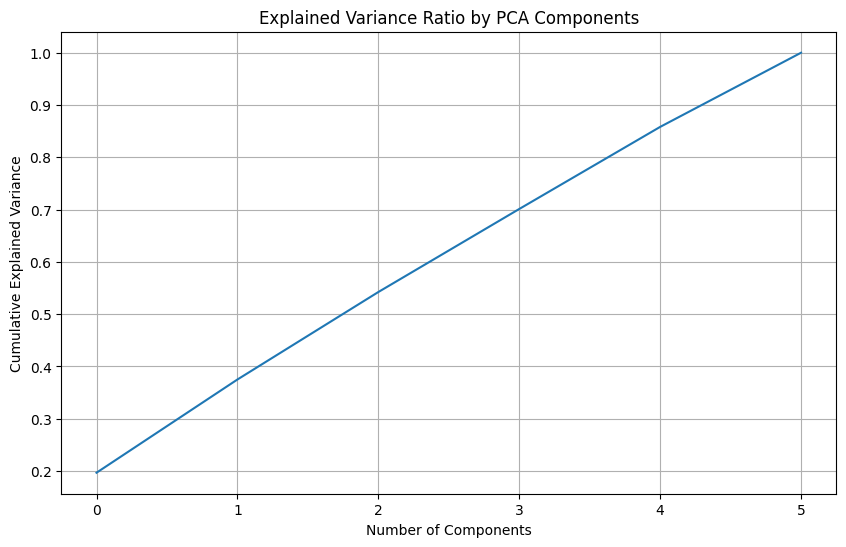

Variance explained by first 2 components: 0.38


In [ ]:
# Re-run PCA without limiting n_components to see full variance explained
pca_full = PCA()
pca_full.fit(X_Scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()

print(f"Variance explained by first 2 components: {np.sum(pca_full.explained_variance_ratio_[:2]):.2f}")

## 7. Clustering Algorithms

This section applies various unsupervised clustering algorithms to the prepared and dimensionality-reduced data.

### K-Means Clustering

K-Means is a popular centroid-based clustering algorithm that aims to partition observations into a predefined number of `k` clusters. Here, we apply K-Means with `n_clusters=2` to identify two primary customer segments. The `n_init='auto'` argument is used for more robust centroid initialization, and `random_state` ensures reproducibility. The cluster centroids are then transformed into the PCA space for plotting.

**Explanation:** This code initializes and runs the K-Means algorithm. kmeans.fit_predict(X_pca) performs the clustering on the 2D PCA data and assigns a cluster label (0 or 1) to each data point, stored in kmeans_labels. pca.transform(kmeans.cluster_centers_) obtains the coordinates of the cluster centers in the same 2D PCA space, which are useful for plotting.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X_pca)

c:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

#### Visualization of K-Means Clusters

This scatter plot visually represents the two clusters identified by K-Means in the 2D PCA space. Each data point is colored according to its assigned cluster, and the cluster centroids are explicitly marked by larger black circles.

**Explanation:** This code generates a scatter plot. X_pca[:, 0] and X_pca[:, 1] provide the x and y coordinates from the PCA-reduced data. hue=kmeans_labels colors the points based on their cluster assignment. The plt.scatter call adds the black circle markers for the cluster centroids. The plot shows two broadly separated groups, indicating a high-level segmentation of the customer base.

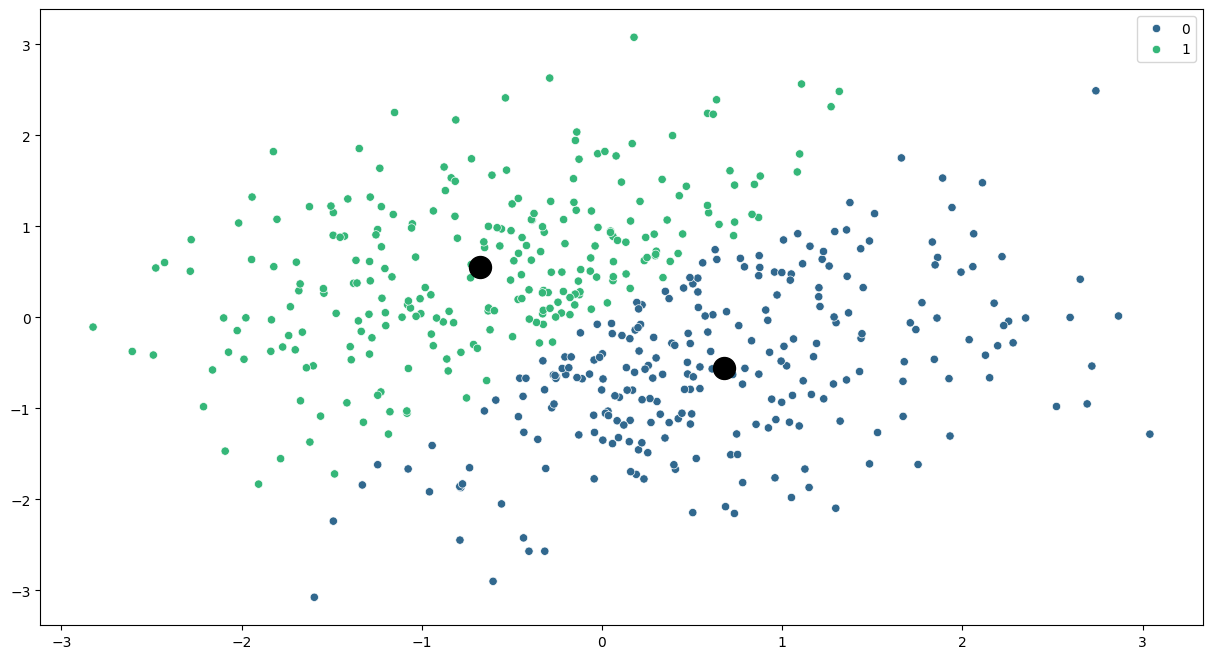

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = kmeans_labels, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', color='black', s=250)
plt.show()

### Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering method that builds a hierarchy of clusters by progressively merging smaller clusters into larger ones. We apply it here with `n_clusters=3` to explore if a more granular segmentation, with three distinct groups, is evident and provides better insights into customer behaviors.

**Explanation:** This code initializes AgglomerativeClustering with a target of 3 clusters. agglo.fit_predict(X_pca) then performs the clustering on the 2D PCA data and assigns a cluster label (0, 1, or 2) to each data point, which is stored in agglo_labels.

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_pca)

#### Visualization of Agglomerative Clusters

This scatter plot displays the three customer segments identified by Agglomerative Clustering in the 2D PCA space. Points are colored according to their assigned cluster label to visually distinguish the groups.

**Explanation:** This code generates another scatter plot. Similar to the K-Means plot, it uses X_pca for coordinates, but hue=agglo_labels colors the points based on the three clusters found by Agglomerative Clustering. This visualization reveals three distinct customer segments, which often appear more separated and interpretable than a two-cluster solution.

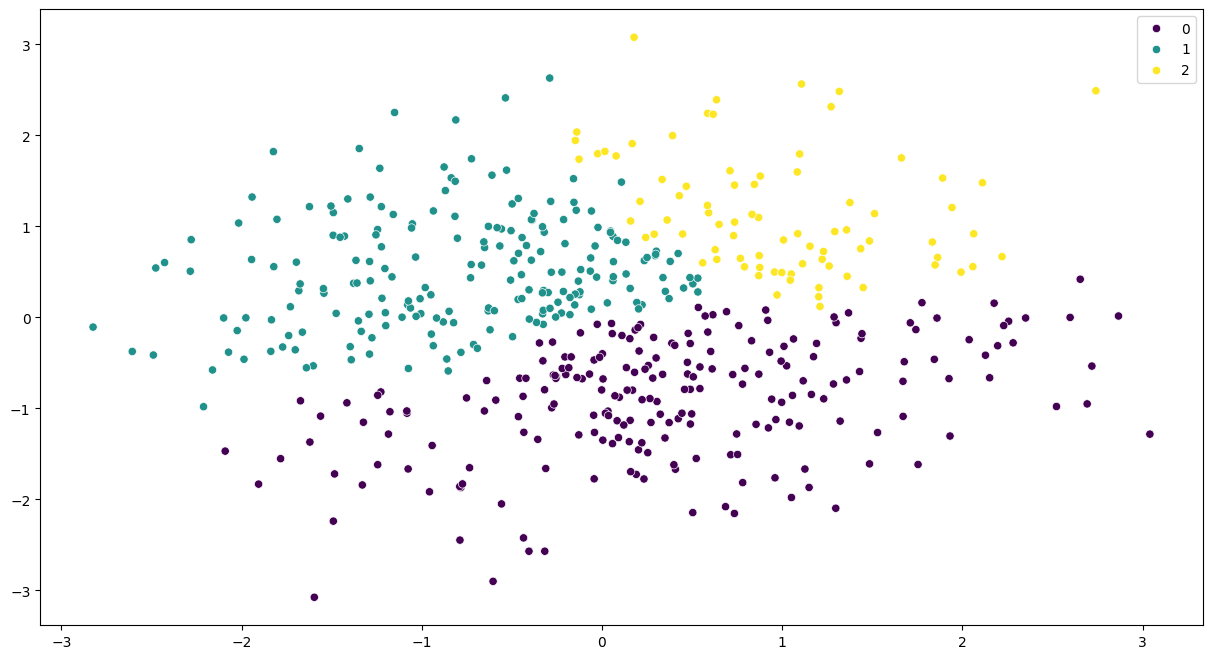

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = agglo_labels, palette = 'viridis')
plt.show()

### DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based algorithm that identifies clusters based on the density of data points. It groups together points that are closely packed, while marking isolated points as outliers (noise). Importantly, it does not require pre-specifying the number of clusters. Here, DBSCAN is applied to the *scaled* data (`X_Scaled`) rather than the PCA-reduced data, as density calculations are sensitive to the original feature space.

**Explanation:** This code initializes DBSCAN with eps=1.5 (maximum distance between samples for them to be considered in the same neighborhood) and min_samples=5 (minimum number of samples in a neighborhood for a point to be considered a core point). db.fit_predict(X_Scaled) then performs the clustering on the scaled data and assigns cluster labels (including -1 for noise points) to db_labels.

In [ ]:
db = DBSCAN(eps=1.5, min_samples=5)

db_labels = db.fit_predict(X_Scaled)

#### Visualization of DBSCAN Clusters

This scatter plot visualizes the clusters identified by DBSCAN. Points are colored according to their assigned cluster label (`db_labels`), with points labeled `-1` representing noise or outliers. For practical visualization in 2D, the plot uses the first two features of the `X_Scaled` data, as `X_Scaled` is still high-dimensional.

**Explanation:** This code generates a scatter plot showing the DBSCAN results. X_Scaled[:, 0] and X_Scaled[:, 1] are used for the x and y axes, displaying the relationship between the first two scaled features. hue=db_labels colors the points based on their assigned clusters or as noise. The plot highlights dense regions that form clusters and distinguishes them from sparser areas or isolated points.

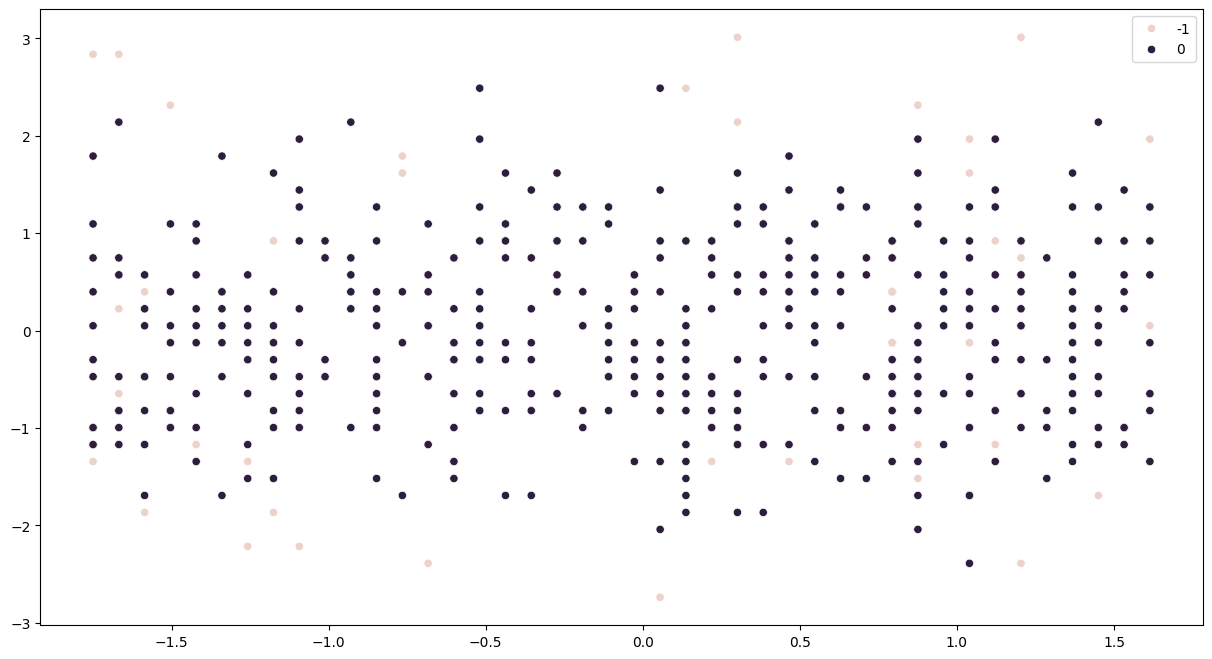

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = X_Scaled[:, 0], y = X_Scaled[:, 1], hue = db_labels)
plt.show()

## 8. Hierarchical Clustering Visualization

### Dendrogram

To gain further insight into the hierarchical relationships within the customer data and potentially assist in determining a suitable number of clusters for hierarchical methods, a dendrogram is constructed. The `linkage` function calculates the linkages between data points using the `ward` method, which minimizes the variance within each cluster. The `dendrogram` function then visualizes this hierarchy, truncated to show the last 30 merged clusters.

**Explanation:** sch.linkage(X_Scaled, method='ward') computes the hierarchical clustering linkages on the scaled data. sch.dendrogram then plots these linkages. truncate_mode = 'lastp' and p=30 mean that only the last 30 merge steps are shown, making the plot readable. The dendrogram visually represents how data points are grouped into clusters at various distances, with long vertical lines indicating significant distances where distinct clusters merge. This helps in identifying natural 'breaks' in the data that could suggest optimal cluster counts.

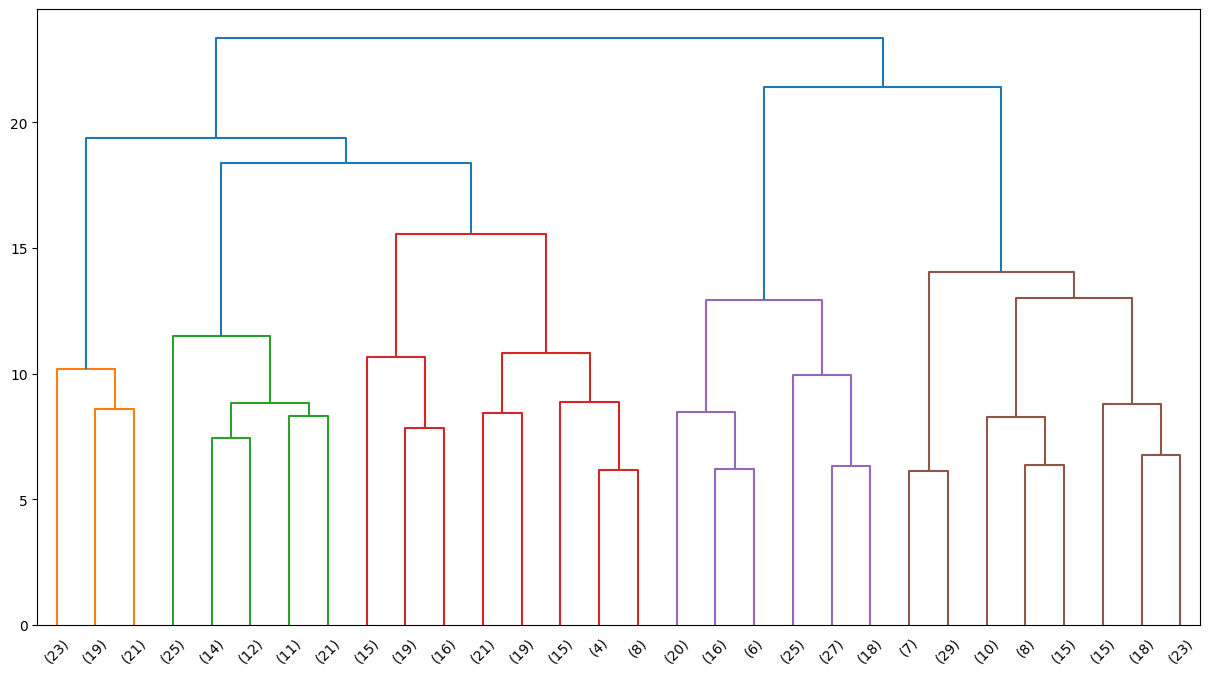

In [ ]:
link = linkage(X_Scaled, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(link,truncate_mode = 'lastp', p=30)
plt.show()

## Cluster Profiling (Example for K-Means)

In [ ]:
# First, add the cluster labels back to your original DataFrame (or data1)
# Make sure 'data1' or 'df' has all the original features you want to profile.
# Let's use 'data1' which has UserID removed, and fav_cuisine encoded.
data_with_clusters = data1.copy()
data_with_clusters['KMeans_Cluster'] = kmeans_labels # Add K-Means labels
data_with_clusters['Agglo_Cluster'] = agglo_labels   # Add Agglomerative labels
data_with_clusters['DBSCAN_Cluster'] = db_labels     # Add DBSCAN labels


In [ ]:
# --- Profile K-Means Clusters ---
print("--- K-Means Cluster Profiles (Mean Values) ---")
kmeans_profile = data_with_clusters.groupby('KMeans_Cluster')[X.columns].mean() # Use X.columns for features
print(kmeans_profile)

--- K-Means Cluster Profiles (Mean Values) ---
                   Age  TotalOrders  AverageSpend  DeliveryRating  \
KMeans_Cluster                                                      
0               31.732       29.468     321.78136          3.4204   
1               46.920       29.960     291.38800          4.0984   

                AppUsageTimePerDay  fav_cuisine  
KMeans_Cluster                                   
0                          78.2012        2.304  
1                         108.8296        1.828  


In [ ]:
# You can also add standard deviations or other aggregates if helpful
# kmeans_std = data_with_clusters.groupby('KMeans_Cluster')[X.columns].std()
# print("\n--- K-Means Cluster Profiles (Standard Deviation) ---")
# print(kmeans_std)

# --- Profile Agglomerative Clusters ---
print("\n--- Agglomerative Cluster Profiles (Mean Values) ---")
agglo_profile = data_with_clusters.groupby('Agglo_Cluster')[X.columns].mean()
print(agglo_profile)


--- Agglomerative Cluster Profiles (Mean Values) ---
                     Age  TotalOrders  AverageSpend  DeliveryRating  \
Agglo_Cluster                                                         
0              29.240741    28.023148    305.434259        3.437500   
1              47.117647    29.661765    286.186912        4.091667   
2              46.687500    34.412500    361.705125        3.781250   

               AppUsageTimePerDay  fav_cuisine  
Agglo_Cluster                                   
0                       87.064352     2.083333  
1                      110.642647     1.696078  
2                       67.258750     2.962500  


In [ ]:
# --- Profile DBSCAN Clusters ---
# Remember DBSCAN can have a -1 cluster for noise
print("\n--- DBSCAN Cluster Profiles (Mean Values) ---")
dbscan_profile = data_with_clusters.groupby('DBSCAN_Cluster')[X.columns].mean()
print(dbscan_profile)


--- DBSCAN Cluster Profiles (Mean Values) ---
                      Age  TotalOrders  AverageSpend  DeliveryRating  \
DBSCAN_Cluster                                                         
-1              39.159091    30.795455    270.717273        3.740909   
 0              39.342105    29.609649    310.045570        3.761184   

                AppUsageTimePerDay  fav_cuisine  
DBSCAN_Cluster                                   
-1                       98.593182     2.068182  
 0                       93.025439     2.065789  


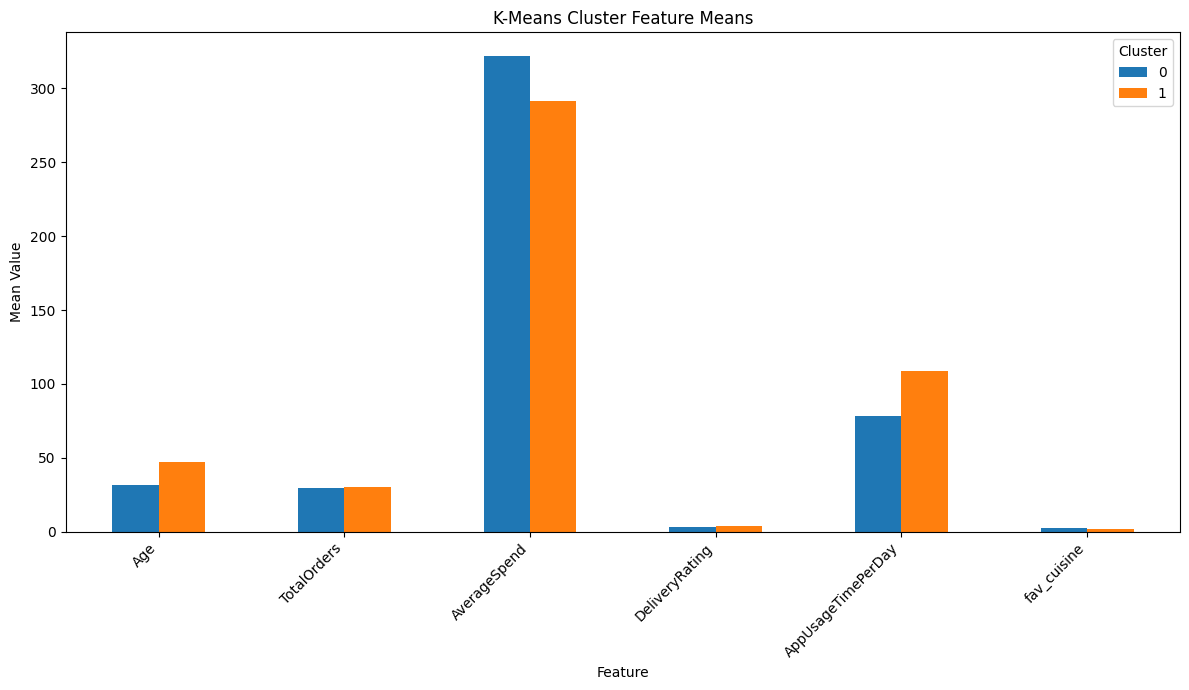

In [ ]:
# Visualize profiles using bar plots
# Example for K-Means:
kmeans_profile.T.plot(kind='bar', figsize=(12, 7))
plt.title('K-Means Cluster Feature Means')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Do similar plots for Agglomerative and DBSCAN profiles

## 9. Key Insights and Observations

Based on our comprehensive data exploration and application of various clustering algorithms, several key insights have been observed:

*   **Data Quality:** The dataset is clean, with no missing values or duplicates, ensuring reliable analysis.
*   **Customer Diversity:** The descriptive statistics highlight a broad range in customer demographics (age) and behavioral attributes (total orders, average spend, app usage time), indicating a heterogeneous customer base.
*   **Cuisine Preference Distribution:** The analysis of `fav_cuisine` shows an uneven distribution, suggesting certain cuisine types are significantly more popular than others.
*   **Clustering Performance:**
    *   K-Means (2 clusters) provides a high-level segmentation, broadly separating customers.
    *   Agglomerative Clustering (3 clusters) appears to offer a more nuanced and visually distinct segmentation, potentially revealing more actionable customer groups.
    *   DBSCAN identified density-based clusters and isolated outliers, which is useful for pinpointing core customer concentrations and unique profiles.
*   **Hierarchical Structure:** The dendrogram supports the existence of natural groupings within the data, which can guide decisions on the optimal number of clusters for hierarchical approaches.

These insights are foundational for developing targeted business strategies, such as customized marketing campaigns, personalized recommendations, or improvements in service delivery tailored to specific customer segments.

## 10. Conclusion

This project successfully performed a detailed customer segmentation analysis on the food delivery dataset. We initiated with thorough data loading and exploration, followed by essential data preprocessing steps including feature encoding, scaling, and dimensionality reduction. Subsequently, multiple clustering algorithms (K-Means, Agglomerative Clustering, and DBSCAN) were applied, and their results were visualized. The hierarchical structure of the data was also explored through a dendrogram.

The application of various clustering techniques provided different perspectives on customer grouping, with Agglomerative Clustering showing promising visual separation into three segments.

The identified customer segments represent distinct groups based on their behavioral and demographic attributes. These segments are valuable for strategic decision-making.

**Next steps could include:**

*   **Cluster Profiling:** Conduct a detailed analysis of the characteristics (e.g., mean values of original features) for each identified cluster to understand the unique profile of each customer segment.
*   **Optimal Cluster Number Determination:** Employ quantitative evaluation metrics (e.g., Silhouette Score, Elbow Method) to formally determine the most suitable number of clusters for each algorithm.
*   **Actionable Business Recommendations:** Translate the insights from the customer segments into concrete, data-driven business strategies, such as targeted promotions, personalized service offerings, or tailored loyalty programs.